In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Charger TON dataset
path = "/content/drive/MyDrive/DS 2025/futuristic_city_traffic.csv"
df = pd.read_csv(path)

df.head()


,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


In [ ]:
df = df.drop_duplicates()

# The column 'DateTime' does not exist in the DataFrame.
# Please check the available columns using df.columns and modify if necessary.
# Convertir la date
# df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

# df = df.dropna(subset=['DateTime'])

print("Available columns in the DataFrame:")
print(df.columns)

Available columns in the DataFrame:
Index(['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week',
       'Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred',
       'Energy Consumption', 'Traffic Density'],
      dtype='object')


In [ ]:
# The 'DateTime' column does not exist in the DataFrame.
# We will use existing relevant columns for 'hour' and 'weekday'.

# Use the 'Hour Of Day' column directly for the 'hour' feature.
df['hour'] = df['Hour Of Day']

# Use the 'Day Of Week' column for 'weekday'.
# If a numerical representation (0-6) is preferred, further encoding might be needed.
df['weekday'] = df['Day Of Week']

# 'day' and 'month' cannot be extracted without a proper 'DateTime' column.
# If you have date components elsewhere, you would need to combine them first to create a 'DateTime' column.
# df['day'] = df['DateTime'].dt.day
# df['month'] = df['DateTime'].dt.month

In [ ]:
display(df.head())

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density,hour,weekday
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241,20,Sunday
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208,2,Wednesday
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415,16,Wednesday
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811,8,Thursday
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544,16,Saturday


In [ ]:
# Numérique → médiane
for col in df.select_dtypes(include=['float64','int64']):
    df[col] = df[col].fillna(df[col].median())

# Catégoriel → "Unknown"
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].fillna("Unknown")

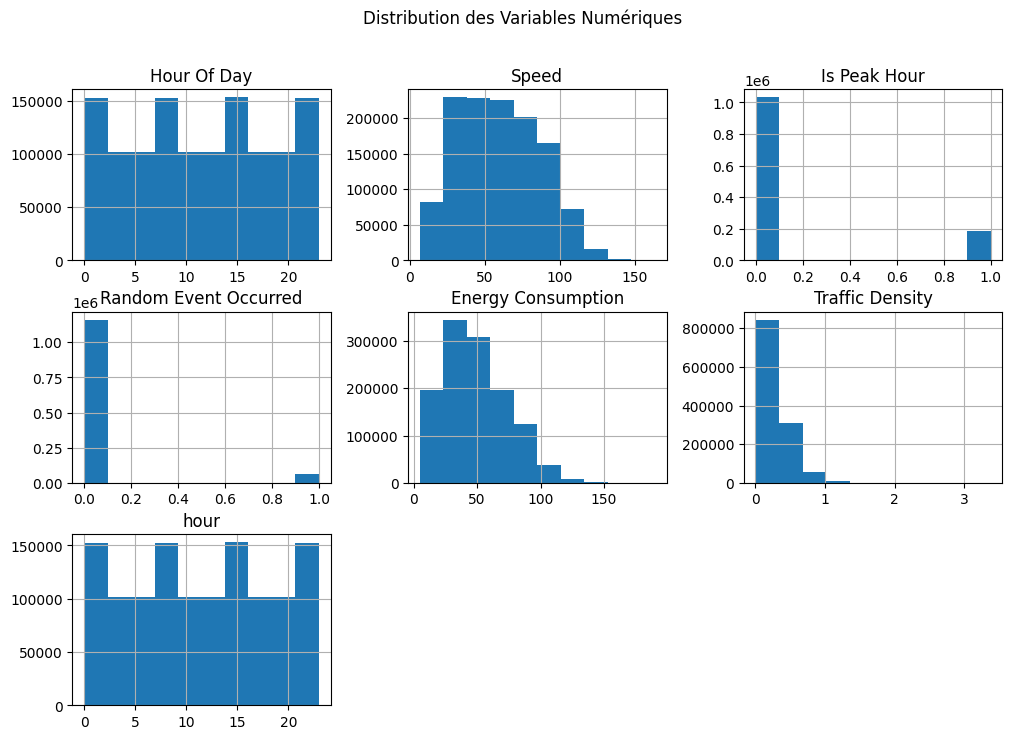

In [ ]:
num_cols = df.select_dtypes(include=['float64','int64']).columns

df[num_cols].hist(figsize=(12, 8))
plt.suptitle("Distribution des Variables Numériques")
plt.show()

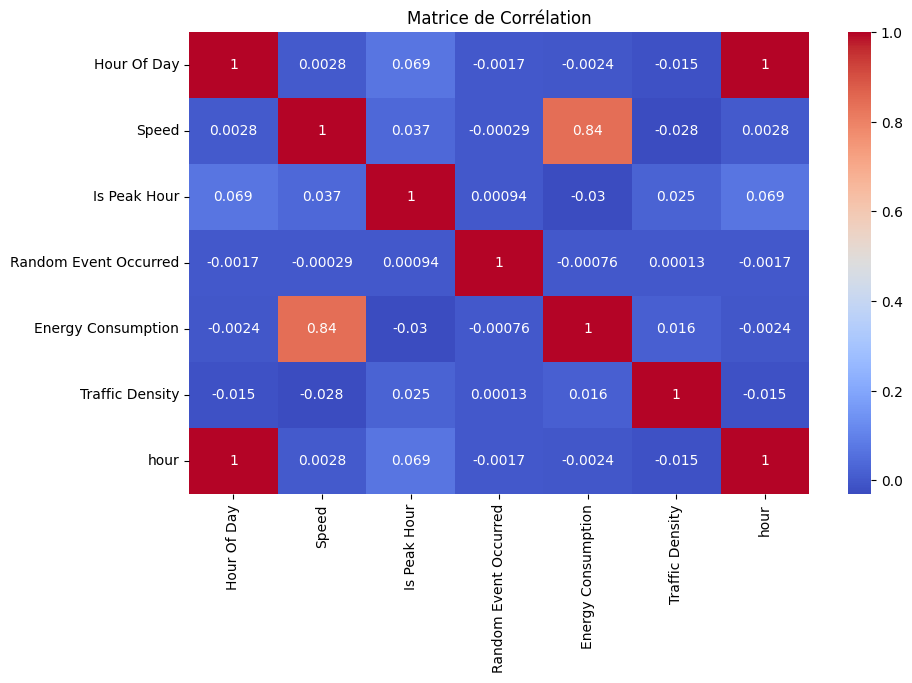

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de Corrélation")
plt.show()

In [ ]:
X = df.drop(columns=['Traffic Density'])
y = df['Traffic Density']

In [ ]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['float64','int64']).columns

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}


In [36]:
# Cross-validation ultra-rapide
for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', model)
    ])

    scores = cross_val_score(
        pipe, X, y,
        cv=2,                     # BEAUCOUP plus rapide
        scoring='neg_mean_squared_error',
        n_jobs=-1                 # utilise tous les coeurs CPU
    )

    rmse = np.sqrt(-scores.mean())
    print(f"{name} → RMSE rapide = {rmse:.4f}")


Linear Regression → RMSE rapide = 0.1284


KeyboardInterrupt: 